# IMPORTS

In [30]:
!sudo apt update
%pip install openpyxl

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

'sudo' n'est pas reconnu en tant que commande interne
ou externe, un programme ex�cutable ou un fichier de commandes.


Note: you may need to restart the kernel to use updated packages.


# Parrainages élections présidentielles

In [31]:
parrainages = pd.read_csv('Présidentielles/parrainagestotal.csv', delimiter=';')

In [32]:
parrainages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13427 entries, 0 to 13426
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Civilité             13427 non-null  object
 1   Nom                  13427 non-null  object
 2   Prénom               13427 non-null  object
 3   Mandat               13427 non-null  object
 4   Circonscription      11026 non-null  object
 5   Département          13427 non-null  object
 6   Candidat             13427 non-null  object
 7   Date de publication  13427 non-null  object
dtypes: object(8)
memory usage: 839.3+ KB


In [33]:
parrainages.head()

Civilité       Nom        Prénom Mandat      Circonscription    Département  \
0       M.  CORDIVAL        Gilles  Maire      Mont-Saint-Père          Aisne   
1      Mme   VALLIET         Odile  Maire             Crupilly          Aisne   
2       M.  GUEYRAUD    Jean-Marie  Maire    Saint-Auban-d'Oze   Hautes-Alpes   
3      Mme    NOUVEL  Marie-Claude  Maire           Seignalens           Aude   
4       M.   GAINCHE     Jean-Paul  Maire  Langrolay-sur-Rance  Côtes-d'Armor   

           Candidat Date de publication  
0  ARTHAUD Nathalie          01/02/2022  
1  ARTHAUD Nathalie          01/02/2022  
2  ARTHAUD Nathalie          01/02/2022  
3  ARTHAUD Nathalie          01/02/2022  
4  ARTHAUD Nathalie          01/02/2022

In [34]:
parrainages.describe().transpose()

count unique               top  freq
Civilité             13427      2                M.  9889
Nom                  13427  10308            MARTIN    43
Prénom               13427   1615            Michel   336
Mandat               13427     29             Maire  8712
Circonscription      11026   8889     Île-De-France   136
Département          13427    110              Nord   259
Candidat             13427     64  PÉCRESSE Valérie  2636
Date de publication  13427     11        08/02/2022  3017

In [35]:
parrainages.isnull().sum()

Civilité                  0
Nom                       0
Prénom                    0
Mandat                    0
Circonscription        2401
Département               0
Candidat                  0
Date de publication       0
dtype: int64

2401 données sur les circonscriptions manquantes sur 13427 lignes pour cette colonne, soit 18%.

<Axes: >

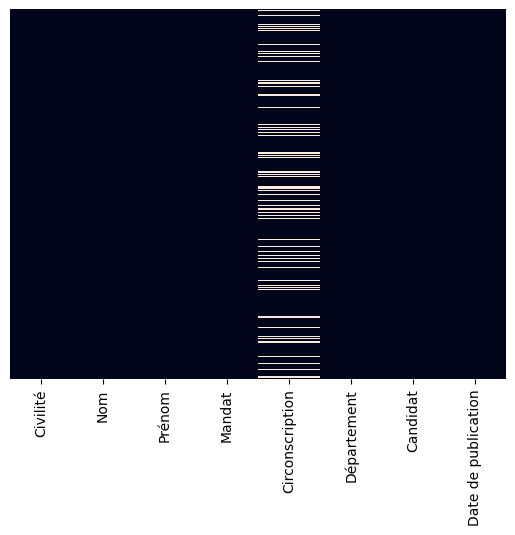

In [36]:
sns.heatmap(parrainages.isnull(), yticklabels=False, cbar=False)

In [37]:
parrainages['Civilité'].value_counts()

Civilité
M.     9889
Mme    3538
Name: count, dtype: int64

In [38]:
# Afficher toutes les valeurs pour value_counts()
pd.set_option("display.max_rows", None)

In [39]:
parrainages['Candidat'].value_counts()

Candidat
PÉCRESSE Valérie                2636
MACRON Emmanuel                 2098
HIDALGO Anne                    1440
MÉLENCHON Jean-Luc               906
ZEMMOUR Éric                     741
JADOT Yannick                    712
LASSALLE Jean                    642
ROUSSEL Fabien                   626
LE PEN Marine                    622
DUPONT-AIGNAN Nicolas            600
POUTOU Philippe                  596
ARTHAUD Nathalie                 576
ASSELINEAU François              293
TAUBIRA Christiane               274
KAZIB Anasse                     160
THOUY Hélène                     139
KOENIG Gaspard                   107
KUZMANOVIC Georges                49
MIGUET Nicolas                    40
EGGER Clara                       36
CHICHE Arnaud                     21
MARTINEZ Antoine                  13
FORTANÉ Jean-Marc                 12
SMATI  Rafik                      10
ROCCA Martin                       9
CAU Marie                          8
WAECHTER Antoine             

In [40]:
parrainages['Mandat'].value_counts()

Mandat
Maire                                                                                      8712
Conseillère départementale                                                                  854
Conseiller départemental                                                                    740
Conseillère régionale                                                                       581
Conseiller régional                                                                         511
Maire délégué d'une commune associée ou d'une commune déléguée                              345
Député                                                                                      309
Députée                                                                                     221
Sénateur                                                                                    191
Membre d'une assemblée d'une collectivité territoriale d'outre-mer à statut particulier     150
Maire déléguée d'une commune asso

# Résultats élections présidentielles

## 1er tour (ville de Paris)

In [41]:
resultsPresParis = pd.read_excel('Présidentielles/elections-presidentielles2022-1ertour.xlsx')

In [42]:
resultsPresParis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 899 entries, 0 to 898
Data columns (total 31 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   ID_BVOTE               899 non-null    object        
 1   SCRUTIN                899 non-null    object        
 2   ANNEE                  899 non-null    int64         
 3   TOUR                   899 non-null    int64         
 4   DATE                   899 non-null    datetime64[ns]
 5   NUM_CIRC               899 non-null    int64         
 6   NUM_QUARTIER           899 non-null    int64         
 7   NUM_ARROND             899 non-null    int64         
 8   NUM_SEC                899 non-null    int64         
 9   NUM_BUREAU             899 non-null    int64         
 10  NB_PROCURATION         899 non-null    int64         
 11  NB_INSCRIT             899 non-null    int64         
 12  NB_EMARGEMENT          899 non-null    int64         
 13  NB_VO

In [43]:
resultsPresParis.head()

ID_BVOTE         SCRUTIN  ANNEE  TOUR       DATE  NUM_CIRC  \
0                15-81  Présidentielle   2022     1 2022-04-10        13   
1                19-21  Présidentielle   2022     1 2022-04-10        16   
2                15-44  Présidentielle   2022     1 2022-04-10        12   
3  2019-11-01 00:00:00  Présidentielle   2022     1 2022-04-10         7   
4                15-94  Présidentielle   2022     1 2022-04-10        13   

   NUM_QUARTIER  NUM_ARROND  NUM_SEC  NUM_BUREAU  ...  LE PEN Marine  \
0            60          15       15          81  ...             64   
1            75          19       19          21  ...             43   
2            57          15       15          44  ...             89   
3            42          11       11          19  ...             38   
4            60          15       15          94  ...            107   

   ZEMMOUR Eric  MELENCHON Jean-Luc  HIDALGO Anne  JADOT Yannick  \
0            97                 232            27             92   
1           115                 599            36             72   
2           100                 329            22             87   
3            58                 400            34            134   
4            97                 314            17             50   

   PECRESSE Valerie  POUTOU Philippe  DUPONT-AIGNAN Nicolas  \
0               107                2                     13   
1                31                9                     13   
2                89                6                     12   
3                58                6                     12   
4                79                7                     13   

                                           geo_shape  \
0  {"coordinates": [[[2.277588554388263, 48.84254...   
1  {"coordinates": [[[2.394378191850599, 48.88737...   
2  {"coordinates": [[[2.310069360648848, 48.83636...   
3  {"coordinates": [[[2.372778343143363, 48.86192...   
4  {"coordinates": [[[2.283943524842908, 48.84487...   

                            geo_point_2d  
0   48.84326325186045, 2.279593969952727  
1   48.8875141175041, 2.3926420122494827  
2  48.83460502152915, 2.3105550294022508  
3    48.8599623028594, 2.374136595434677  
4  48.84621791618217, 2.2839458188282085  

[5 rows x 31 columns]

In [44]:
resultsPresParis.describe().transpose()

count                 mean                  min  \
ANNEE                  899.0               2022.0               2022.0   
TOUR                   899.0                  1.0                  1.0   
DATE                     899  2022-04-10 00:00:00  2022-04-10 00:00:00   
NUM_CIRC               899.0             9.212458                  1.0   
NUM_QUARTIER           899.0            52.757508                  1.0   
NUM_ARROND             899.0             13.58287                  1.0   
NUM_SEC                899.0            13.491657                  1.0   
NUM_BUREAU             899.0             30.67297                  1.0   
NB_PROCURATION         899.0            67.727475                  0.0   
NB_INSCRIT             899.0          1506.509455                694.0   
NB_EMARGEMENT          899.0          1179.496107                 66.0   
NB_VOTANT              899.0          1179.787542                 66.0   
NB_VOTE_BLANC          899.0            11.953281                  1.0   
NB_VOTE_NUL            899.0             4.248053                  0.0   
NB_EXPRIME             899.0          1163.586207                 65.0   
ARTHAUD Nathalie       899.0             3.124583                  0.0   
ROUSSEL Fabien         899.0            19.114572                  0.0   
MACRON Emmanuel        899.0           413.004449                 22.0   
LASSALLE Jean          899.0            13.285873                  0.0   
LE PEN Marine          899.0            62.761958                  3.0   
ZEMMOUR Eric           899.0            95.426029                  6.0   
MELENCHON Jean-Luc     899.0           348.302558                 16.0   
HIDALGO Anne           899.0            25.392659                  2.0   
JADOT Yannick          899.0             89.21802                  8.0   
PECRESSE Valerie       899.0            77.149055                  4.0   
POUTOU Philippe        899.0             6.190211                  0.0   
DUPONT-AIGNAN Nicolas  899.0             10.61624                  0.0   

                                       25%                  50%  \
ANNEE                               2022.0               2022.0   
TOUR                                   1.0                  1.0   
DATE                   2022-04-10 00:00:00  2022-04-10 00:00:00   
NUM_CIRC                               5.0                  9.0   
NUM_QUARTIER                          42.0                 56.0   
NUM_ARROND                            11.0                 14.0   
NUM_SEC                               11.0                 14.0   
NUM_BUREAU                            12.0                 26.0   
NB_PROCURATION                        53.0                 69.0   
NB_INSCRIT                          1400.5               1509.0   
NB_EMARGEMENT                       1090.5               1189.0   
NB_VOTANT                           1090.5               1189.0   
NB_VOTE_BLANC                          9.0                 12.0   
NB_VOTE_NUL                            2.0                  4.0   
NB_EXPRIME                          1076.0               1172.0   
ARTHAUD Nathalie                       1.0                  3.0   
ROUSSEL Fabien                        13.0                 19.0   
MACRON Emmanuel                      316.5                422.0   
LASSALLE Jean                         10.0                 13.0   
LE PEN Marine                         48.0                 59.0   
ZEMMOUR Eric                          64.0                 81.0   
MELENCHON Jean-Luc                   214.0                353.0   
HIDALGO Anne                          17.0                 26.0   
JADOT Yannick                         60.0                 91.0   
PECRESSE Valerie                      43.0                 65.0   
POUTOU Philippe                        3.0                  6.0   
DUPONT-AIGNAN Nicolas                  7.0                 10.0   

                                       75%                  max         s

In [45]:
resultsPresParis.isnull().sum()

ID_BVOTE                 0
SCRUTIN                  0
ANNEE                    0
TOUR                     0
DATE                     0
NUM_CIRC                 0
NUM_QUARTIER             0
NUM_ARROND               0
NUM_SEC                  0
NUM_BUREAU               0
NB_PROCURATION           0
NB_INSCRIT               0
NB_EMARGEMENT            0
NB_VOTANT                0
NB_VOTE_BLANC            0
NB_VOTE_NUL              0
NB_EXPRIME               0
ARTHAUD Nathalie         0
ROUSSEL Fabien           0
MACRON Emmanuel          0
LASSALLE Jean            0
LE PEN Marine            0
ZEMMOUR Eric             0
MELENCHON Jean-Luc       0
HIDALGO Anne             0
JADOT Yannick            0
PECRESSE Valerie         0
POUTOU Philippe          0
DUPONT-AIGNAN Nicolas    0
geo_shape                0
geo_point_2d             0
dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

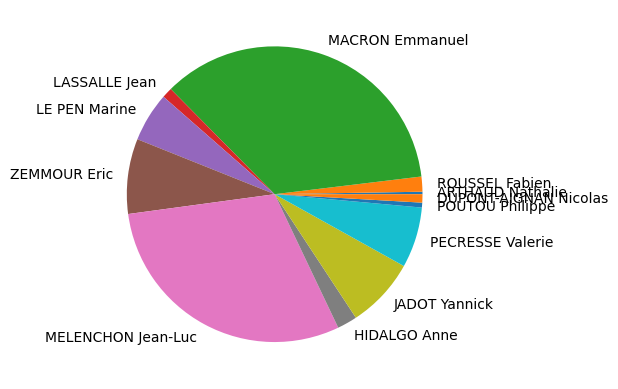

In [65]:
labelsCandidats = ['ARTHAUD Nathalie', 'ROUSSEL Fabien', 'MACRON Emmanuel','LASSALLE Jean','LE PEN Marine','ZEMMOUR Eric','MELENCHON Jean-Luc','HIDALGO Anne','JADOT Yannick','PECRESSE Valerie','POUTOU Philippe','DUPONT-AIGNAN Nicolas']

artaud = resultsPresParis.iloc[0:900, 17].sum()
roussel = resultsPresParis.iloc[0:900, 18].sum()
macron = resultsPresParis.iloc[0:900, 19].sum()
lassalle = resultsPresParis.iloc[0:900, 20].sum()
le_pen = resultsPresParis.iloc[0:900, 21].sum()
zemmour = resultsPresParis.iloc[0:900, 22].sum()
melenchon = resultsPresParis.iloc[0:900, 23].sum()
hidalgo = resultsPresParis.iloc[0:900, 24].sum()
jadot = resultsPresParis.iloc[0:900, 25].sum()
pecresse = resultsPresParis.iloc[0:900, 26].sum()
poutou = resultsPresParis.iloc[0:900, 27].sum()
dupont_aignan = resultsPresParis.iloc[0:900, 28].sum()

total_votes = np.array([artaud, roussel, macron, lassalle, le_pen, zemmour, melenchon, hidalgo, jadot, pecresse, poutou, dupont_aignan])
plt.pie(x = total_votes, labels = labelsCandidats)
plt.show

## 2nd tour (niveau national)

In [47]:
resultsPresSndTour = pd.read_excel('Présidentielles/resultats-par-niveau-burvot-t2-france-entiere.xlsx')

In [48]:
resultsPresSndTour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69682 entries, 0 to 69681
Data columns (total 35 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Code du département            69682 non-null  object 
 1   Libellé du département         69682 non-null  object 
 2   Code de la circonscription     69682 non-null  int64  
 3   Libellé de la circonscription  69682 non-null  object 
 4   Code de la commune             69682 non-null  int64  
 5   Libellé de la commune          69682 non-null  object 
 6   Code du b.vote                 69682 non-null  object 
 7   Inscrits                       69682 non-null  int64  
 8   Abstentions                    69682 non-null  int64  
 9   % Abs/Ins                      69682 non-null  float64
 10  Votants                        69682 non-null  int64  
 11  % Vot/Ins                      69682 non-null  float64
 12  Blancs                         69682 non-null 

In [49]:
resultsPresSndTour.head()

Code du département Libellé du département  Code de la circonscription  \
0                  01                    Ain                           4   
1                  01                    Ain                           5   
2                  01                    Ain                           5   
3                  01                    Ain                           5   
4                  01                    Ain                           5   

  Libellé de la circonscription  Code de la commune    Libellé de la commune  \
0          4ème circonscription                   1  L'Abergement-Clémenciat   
1          5ème circonscription                   2    L'Abergement-de-Varey   
2          5ème circonscription                   4        Ambérieu-en-Bugey   
3          5ème circonscription                   4        Ambérieu-en-Bugey   
4          5ème circonscription                   4        Ambérieu-en-Bugey   

  Code du b.vote  Inscrits  Abstentions  % Abs/Ins  ...  Voix  % Voix/Ins  \
0           0001       643          146      22.71  ...   237       36.86   
1           0001       213           45      21.13  ...    94       44.13   
2           0001      1130          322      28.50  ...   360       31.86   
3           0002      1129          313      27.72  ...   426       37.73   
4           0003      1213          303      24.98  ...   449       37.02   

   % Voix/Exp  N°Panneau Le Pen  Sexe Le Pen  Nom Le Pen  Prénom Le Pen  \
0       52.67                 2            F      LE PEN         Marine   
1       66.20                 2            F      LE PEN         Marine   
2       50.35                 2            F      LE PEN         Marine   
3       56.57                 2            F      LE PEN         Marine   
4       55.99                 2            F      LE PEN         Marine   

   Voix Le Pen  % Voix/Ins Le Pen  % Voix/Exp le Pen  
0          213              33.13              47.33  
1           48              22.54              33.80  
2          355              31.42              49.65  
3          327              28.96              43.43  
4          353              29.10              44.01  

[5 rows x 35 columns]

In [50]:
resultsPresSndTour.describe().transpose()

count        mean         std  min     25%  \
Code de la circonscription  69682.0    4.185270    3.289381  1.0    2.00   
Code de la commune          69682.0  236.255920  186.686168  1.0   82.00   
Inscrits                    69682.0  699.640352  974.568291  0.0  299.00   
Abstentions                 69682.0  195.974011  548.908296  0.0   62.00   
% Abs/Ins                   69682.0   25.492261    9.938755  0.0   19.62   
Votants                     69682.0  503.666341  473.573977  0.0  230.00   
% Vot/Ins                   69682.0   74.491982    9.977599  0.0   71.33   
Blancs                      69682.0   32.058552   22.556200  0.0   15.00   
% Blancs/Ins                69682.0    4.997772    2.342566  0.0    3.66   
% Blancs/Vot                69682.0    6.680086    3.003156  0.0    5.03   
Nuls                        69682.0   11.556055   16.963339  0.0    5.00   
% Nuls/Ins                  69682.0    1.865797    2.373892  0.0    1.05   
% Nuls/Vot                  69682.0    2.516634    3.144172  0.0    1.43   
Exprimés                    69682.0  460.051735  450.853574  0.0  207.00   
% Exp/Ins                   69682.0   67.628438    9.535603  0.0   64.27   
% Exp/Vot                   69682.0   90.737347    4.891851  0.0   89.42   
N°Panneau                   69682.0    1.000000    0.000000  1.0    1.00   
Voix                        69682.0  269.347019  369.330104  0.0   95.00   
% Voix/Ins                  69682.0   37.007840   10.583387  0.0   30.21   
% Voix/Exp                  69682.0   54.804561   14.346838  0.0   44.59   
N°Panneau Le Pen            69682.0    2.000000    0.000000  2.0    2.00   
Voix Le Pen                 69682.0  190.704716  128.781222  0.0   99.00   
% Voix/Ins Le Pen           69682.0   30.620543   10.736826  0.0   23.03   
% Voix/Exp le Pen           69682.0   45.056272   14.299473  0.0   35.34   

                               50%     75%        max  
Code de la circonscription    3.00    5.00      21.00  
Code de la commune          193.00  349.00     909.00  
Inscrits                    753.00  972.00  123838.00  
Abstentions                 180.00  267.00   67811.00  
% Abs/Ins                    23.30   28.67     100.00  
Votants                     531.00  710.00   56027.00  
% Vot/Ins                    76.70   80.38     100.00  
Blancs                       31.00   46.00    1723.00  
% Blancs/Ins                  4.72    5.96      54.17  
% Blancs/Vot                  6.36    7.88     100.00  
Nuls                         10.00   16.00    1156.00  
% Nuls/Ins                    1.57    2.27     100.00  
% Nuls/Vot                    2.12    3.04     100.00  
Exprimés                    483.00  649.00   53973.00  
% Exp/Ins                    69.47   73.31     100.00  
% Exp/Vot                    91.37   92.97     100.00  
N°Panneau                     1.00    1.00       1.00  
Voix                        249.00  386.00   43866.00  
% Voix/Ins                   36.42   43.42      80.77  
% Voix/Exp                   53.85   64.60     100.00  
N°Panneau Le Pen              2.00    2.00       2.00  
Voix Le Pen                 178.00  263.00   10107.00  
% Voix/Ins Le Pen            31.03   38.28     100.00  
% Voix/Exp le Pen            46.11   55.36     100.00

In [51]:
resultsPresSndTour.isnull().sum()

Code du département              0
Libellé du département           0
Code de la circonscription       0
Libellé de la circonscription    0
Code de la commune               0
Libellé de la commune            0
Code du b.vote                   0
Inscrits                         0
Abstentions                      0
% Abs/Ins                        0
Votants                          0
% Vot/Ins                        0
Blancs                           0
% Blancs/Ins                     0
% Blancs/Vot                     0
Nuls                             0
% Nuls/Ins                       0
% Nuls/Vot                       0
Exprimés                         0
% Exp/Ins                        0
% Exp/Vot                        0
N°Panneau                        0
Sexe                             0
Nom                              0
Prénom                           0
Voix                             0
% Voix/Ins                       0
% Voix/Exp                       0
N°Panneau Le Pen    

<function matplotlib.pyplot.show(close=None, block=None)>

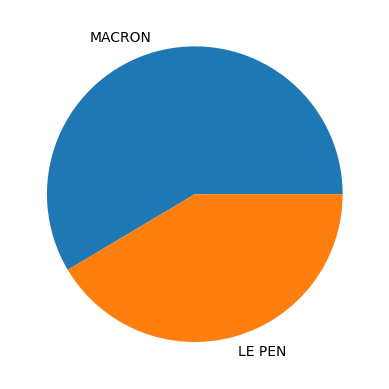

In [52]:
labelsCandidats = ['MACRON', 'LE PEN']

macron = resultsPresSndTour.iloc[0:69683, 25].sum()
le_pen = resultsPresSndTour.iloc[0:69683, 32].sum()

total_votes = np.array([macron, le_pen])
plt.pie(x = total_votes, labels = labelsCandidats)
plt.show

### Corrélations

In [61]:
# # df_results = resultsPresSndTour.drop(columns=['Code du département',	'Libellé du département',	'Code de la circonscription',	'Libellé de la circonscription',	'Code de la commune',	'Libellé de la commune',	'Code du b.vote',	'Inscrits',	'Abstentions',	'% Abs/Ins',	'Votants',	'% Vot/Ins',	'Blancs',	'% Blancs/Ins',	'% Blancs/Vot',	'Nuls',	'% Nuls/Ins',	'% Nuls/Vot',	'Exprimés',	'% Exp/Ins',	'% Exp/Vot',	'N°Panneau',	'Sexe',	'Nom',	'Prénom',	'Voix',	'% Voix/Ins',	'% Voix/Exp',	'N°Panneau Le Pen',	'Sexe Le Pen',	'Nom Le Pen',	'Prénom Le Pen',	'Voix Le Pen',	'% Voix/Ins Le Pen',	'% Voix/Exp le Pen'])
# df_results = resultsPresSndTour.drop(columns=['Libellé du département',	'Code de la circonscription',	'Libellé de la circonscription',	'Code de la commune',	'Libellé de la commune',	'Code du b.vote',	'Inscrits',	'% Abs/Ins',	'Votants',	'% Vot/Ins',	'Blancs',	'% Blancs/Ins',	'% Blancs/Vot',	'Nuls',	'% Nuls/Ins',	'% Nuls/Vot',	'Exprimés',	'% Exp/Ins',	'% Exp/Vot',	'N°Panneau',	'Sexe',	'Nom',	'Prénom',	'% Voix/Ins',	'% Voix/Exp',	'N°Panneau Le Pen',	'Sexe Le Pen',	'Nom Le Pen',	'Prénom Le Pen',	'% Voix/Ins Le Pen',	'% Voix/Exp le Pen'])
# df_corr = df_results.corr()
# sns.heatmap(df_corr, annot=True, cmap='coolwarm')

## Prédictions pour les votes

In [54]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [79]:
d = {'id_candidats': [1,2,3,4,5,6,7,8,9,10,11,12], 'Candidats': labelsCandidats, 'Votes' : total_votes}
df_pred = pd.DataFrame(data=d)
print(df_pred)

# Génération d'un jeu d'entraînement et de test
train_data, test_data, train_target, test_target = train_test_split(df_pred[['id_candidats']], df_pred[['Votes']], test_size=0.2, random_state=42)

# Création et entraînement du modèle
model = LinearRegression()
model.fit(train_data, train_target)

# Prédiction sur l'ensemble de test
y_pred = model.predict(train_data)

next_year = 2027

prediction_inflation = model.predict([[next_year]])
print(f"Prédiction de l'inflation en {next_year} : {prediction_inflation[0]}")

# Évaluation de la précision
# test_pred = model.predict(test_data)
# accuracy = accuracy_score(test_target, test_pred)
# print(f'Accuracy: {accuracy}')


    id_candidats              Candidats   Votes
0              1       ARTHAUD Nathalie    2809
1              2         ROUSSEL Fabien   17184
2              3        MACRON Emmanuel  371291
3              4          LASSALLE Jean   11944
4              5          LE PEN Marine   56423
5              6           ZEMMOUR Eric   85788
6              7     MELENCHON Jean-Luc  313124
7              8           HIDALGO Anne   22828
8              9          JADOT Yannick   80207
9             10       PECRESSE Valerie   69357
10            11        POUTOU Philippe    5565
11            12  DUPONT-AIGNAN Nicolas    9544
Prédiction de l'inflation en 2027 : [-20757674.62430166]


c:\Users\Timothée\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
